In [1]:
import pandas as pd

# Load data files
order_df = pd.read_csv("order_detail.txt", sep=",")  
payment_df = pd.read_csv("payment_detail.txt", sep=",")  
customer_df = pd.read_csv("customer_detail.txt", sep=",")  

# Display first few rows
print(order_df.head())
print(payment_df.head())
print(customer_df.head())


                                                                                                                             INSERT IGNORE INTO order_detail VALUES
('ODR9939707760w' 'C713589L' '2021-11-19 00:00:00' 'P858068' 26100.0   200.0 5220000.0 2610000.00 2610000.00 1.0 1.0 0.0 5)                                     NaN
('ODR7448356649d' 'C551551L' '2021-11-19 00:00:00' 'P886455' 1971942.0 5.0   9859710.0 2464927.50 7394782.50 1.0 0.0 0.0 5)                                     NaN
('ODR4011281866z' 'C685596L' '2021-11-25 00:00:00' 'P678648' 7482000.0 1.0   7482000.0 2065344.62 5416655.38 1.0 0.0 0.0 4)                                     NaN
('ODR3378927994s' 'C830683L' '2021-11-22 00:00:00' 'P540013' 3593680.0 1.0   3593680.0 1455440.40 2138239.60 1.0 1.0 1.0 5)                                     NaN
('ODR4904430099k' 'C191766L' '2021-11-21 00:00:00' 'P491032' 4413220.0 1.0   4413220.0 1059172.80 3354047.20 1.0 1.0 1.0 4)                                     NaN
                

In [4]:
import pandas as pd

# Read the file while skipping SQL statements
order_df = pd.read_csv("order_detail.txt", sep=",", comment="I", header=None)

# Display first few rows
print(order_df.head())
print(order_df.columns)  # Check column names

                  0           1                      2          3          4   \
0  ('ODR9939707760w'  'C713589L'  '2021-11-19 00:00:00'  'P858068'    26100.0   
1  ('ODR7448356649d'  'C551551L'  '2021-11-19 00:00:00'  'P886455'  1971942.0   
2  ('ODR4011281866z'  'C685596L'  '2021-11-25 00:00:00'  'P678648'  7482000.0   
3  ('ODR3378927994s'  'C830683L'  '2021-11-22 00:00:00'  'P540013'  3593680.0   
4  ('ODR4904430099k'  'C191766L'  '2021-11-21 00:00:00'  'P491032'  4413220.0   

      5          6           7           8    9    10   11  12  13  
0  200.0  5220000.0  2610000.00  2610000.00  1.0  1.0  0.0  5) NaN  
1    5.0  9859710.0  2464927.50  7394782.50  1.0  0.0  0.0  5) NaN  
2    1.0  7482000.0  2065344.62  5416655.38  1.0  0.0  0.0  4) NaN  
3    1.0  3593680.0  1455440.40  2138239.60  1.0  1.0  1.0  5) NaN  
4    1.0  4413220.0  1059172.80  3354047.20  1.0  1.0  1.0  4) NaN  
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')


In [6]:
# Assign correct column names (make sure there are 14 names)
order_df.columns = ["order_id", "customer_id", "order_date", "product_id", "qty_ordered",
                    "price", "before_discount", "after_discount", "cogs", "profit", 
                    "unknown1", "unknown2", "unknown3", "rating"]  # Adjust as needed

# Display the first few rows to check correctness
print(order_df.head())

            order_id customer_id             order_date product_id  \
0  ('ODR9939707760w'  'C713589L'  '2021-11-19 00:00:00'  'P858068'   
1  ('ODR7448356649d'  'C551551L'  '2021-11-19 00:00:00'  'P886455'   
2  ('ODR4011281866z'  'C685596L'  '2021-11-25 00:00:00'  'P678648'   
3  ('ODR3378927994s'  'C830683L'  '2021-11-22 00:00:00'  'P540013'   
4  ('ODR4904430099k'  'C191766L'  '2021-11-21 00:00:00'  'P491032'   

   qty_ordered  price  before_discount  after_discount        cogs  profit  \
0      26100.0  200.0        5220000.0      2610000.00  2610000.00     1.0   
1    1971942.0    5.0        9859710.0      2464927.50  7394782.50     1.0   
2    7482000.0    1.0        7482000.0      2065344.62  5416655.38     1.0   
3    3593680.0    1.0        3593680.0      1455440.40  2138239.60     1.0   
4    4413220.0    1.0        4413220.0      1059172.80  3354047.20     1.0   

   unknown1  unknown2 unknown3  rating  
0       1.0       0.0       5)     NaN  
1       0.0       0.0       

In [7]:
order_df['order_date'] = pd.to_datetime(order_df['order_date'], errors='coerce')

In [8]:
print(order_df.isnull().sum())

order_id              0
customer_id           1
order_date            1
product_id            1
qty_ordered           1
price                 1
before_discount       1
after_discount        1
cogs                  1
profit                1
unknown1              1
unknown2              1
unknown3              1
rating             5859
dtype: int64


In [9]:
numeric_cols = ["qty_ordered", "price", "before_discount", "after_discount", "cogs", "profit"]
order_df[numeric_cols] = order_df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [10]:
print(order_df.dtypes)

order_id                   object
customer_id                object
order_date         datetime64[ns]
product_id                 object
qty_ordered               float64
price                     float64
before_discount           float64
after_discount            float64
cogs                      float64
profit                    float64
unknown1                  float64
unknown2                  float64
unknown3                   object
rating                    float64
dtype: object


In [11]:
print(order_df.describe())

                          order_date   qty_ordered        price  \
count                           5858  5.858000e+03  5858.000000   
mean   2022-01-21 06:50:01.433936640  1.050036e+06     2.309321   
min              2021-01-07 00:00:00  0.000000e+00     1.000000   
25%              2021-09-26 00:00:00  6.282850e+04     1.000000   
50%              2022-01-26 00:00:00  2.029420e+05     1.000000   
75%              2022-05-24 00:00:00  9.801855e+05     1.000000   
max              2022-12-08 00:00:00  2.778200e+07  1000.000000   
std                              NaN  1.922160e+06    19.872083   

       before_discount  after_discount          cogs  profit     unknown1  \
count     5.858000e+03    5.858000e+03  5.858000e+03  5858.0  5858.000000   
mean      1.464631e+06    5.667471e+03  1.458963e+06     1.0     0.683510   
min       0.000000e+00   -3.477100e+04  0.000000e+00     1.0     0.000000   
25%       9.274200e+04    0.000000e+00  9.255350e+04     1.0     0.000000   
50%       2

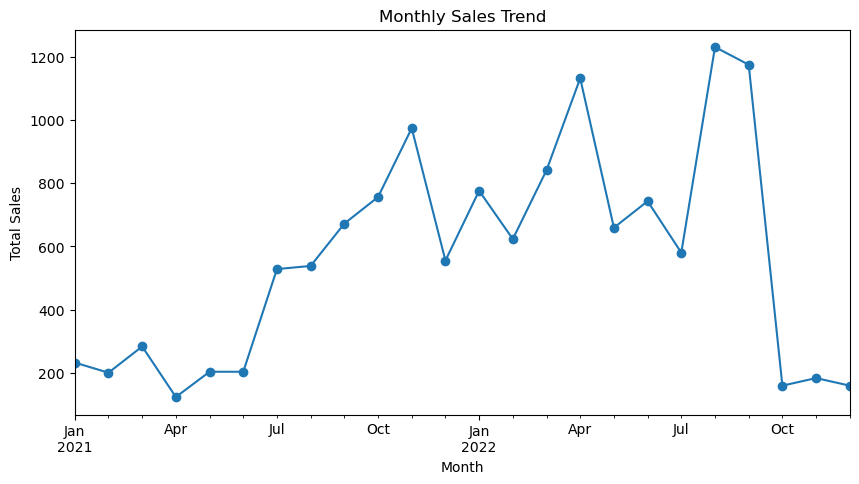

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sales trend over time
order_df.groupby(order_df['order_date'].dt.to_period("M"))['price'].sum().plot(kind='line', marker='o', figsize=(10,5))
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
order_df['customer_id'] = le.fit_transform(order_df['customer_id'])
order_df['product_id'] = le.fit_transform(order_df['product_id'])

In [15]:
print(order_df.isnull().sum())

order_id              0
customer_id           0
order_date            1
product_id            0
qty_ordered           1
price                 1
before_discount       1
after_discount        1
cogs                  1
profit                1
unknown1              1
unknown2              1
unknown3              1
rating             5859
dtype: int64


In [18]:
# Fill NaN values for non-datetime columns with 0
order_df.loc[:, order_df.columns != "order_date"] = order_df.loc[:, order_df.columns != "order_date"].fillna(0)

# Fill NaN values in 'order_date' with a default date (e.g., '2000-01-01')
order_df.loc[:, 'order_date'] = order_df['order_date'].fillna(pd.to_datetime("2000-01-01"))

In [19]:
order_df = order_df.fillna({"order_date": pd.to_datetime("2000-01-01")})

In [20]:
import pickle

# Save the trained model
with open("sales_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [21]:
pip install flask

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from flask import Flask
from werkzeug.serving import run_simple

app = Flask(__name__)

@app.route('/')
def home():
    return "Sales Prediction API is running!"

run_simple('localhost', 5000, app)

 * Running on http://localhost:5000
Press CTRL+C to quit
127.0.0.1 - - [25/Mar/2025 22:17:58] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [25/Mar/2025 22:17:58] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [25/Mar/2025 22:26:43] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [25/Mar/2025 22:26:44] "GET /favicon.ico HTTP/1.1" 404 -


In [ ]:
import requests

url = "http://localhost:5000/predict"
data = {"feature1": 10, "feature2": 20, "feature3": 30}

response = requests.post(url, json=data)
print(response.json())

In [ ]:
if __name__ == "__main__":
    app.run(debug=True)